In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stat
import statsmodels.api as sm
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, classification_report, precision_score, recall_score
from sklearn.metrics import confusion_matrix, precision_recall_curve, roc_curve, auc, log_loss
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score

In [ ]:
! pip install pydataset

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.9/15.9 MB 24.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pydataset: filename=pydataset-0.2.0-py3-none-any.whl size=15939417 sha256=f2f2fa6f0ed8d8ca9ea33903143dc2f4ce9ce14ae13cc83bf97365767a60b1dd
  Stored in directory: /root/.cache/pip/wheels/2b/83/5c/073c3755e8b7704e4677557b2055e61026c1a2342149214c13
Successfully built pydataset


In [ ]:
from pydataset import data
iris = data('iris')

initiated datasets repo at: /root/.pydataset/


1. Utilizando o dataset iris (iris.csv em anexo ou usando o sklearn):
Exemplo de como fazer a importação do dataset usando o sklearn
from sklearn import datasets
iris = datasets.load_iris()
Responda:
a. Faça uma análise inicial sobre esse dataset

Responda:
a. Faça uma análise inicial sobre esse dataset


In [ ]:
iris.head()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
1,5.1,3.5,1.4,0.2,setosa
2,4.9,3.0,1.4,0.2,setosa
3,4.7,3.2,1.3,0.2,setosa
4,4.6,3.1,1.5,0.2,setosa
5,5.0,3.6,1.4,0.2,setosa


In [ ]:
iris.shape

(150, 5)

In [ ]:
iris.columns

Index(['Sepal.Length', 'Sepal.Width', 'Petal.Length', 'Petal.Width', 'Species'], dtype='object')

In [ ]:
iris.describe()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [ ]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
Index: 150 entries, 1 to 150
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Sepal.Length  150 non-null    float64
 1   Sepal.Width   150 non-null    float64
 2   Petal.Length  150 non-null    float64
 3   Petal.Width   150 non-null    float64
 4   Species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 7.0+ KB


In [ ]:
iris.isna().sum()

,0
Sepal.Length,0
Sepal.Width,0
Petal.Length,0
Petal.Width,0
Species,0


In [ ]:
species_counts = iris['Species'].value_counts()
print(species_counts)

Species
setosa        50
versicolor    50
virginica     50
Name: count, dtype: int64


b. Use o boxplot e o histograma para caracterizar as propriedades
de cada uma das espécies existentes.


#Histograma

<Figure size 640x480 with 0 Axes>

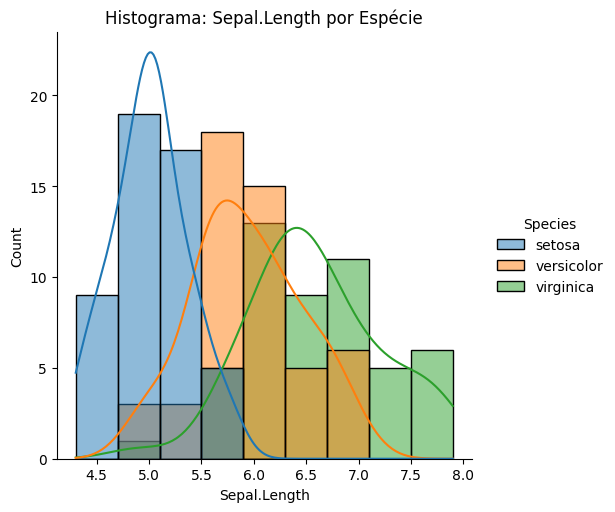

<Figure size 640x480 with 0 Axes>

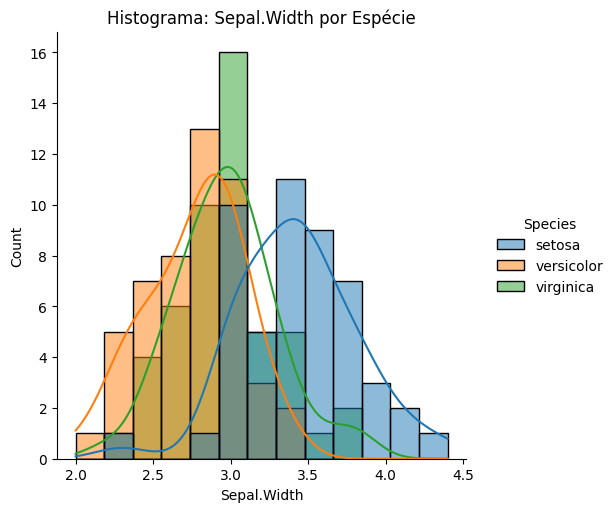

<Figure size 640x480 with 0 Axes>

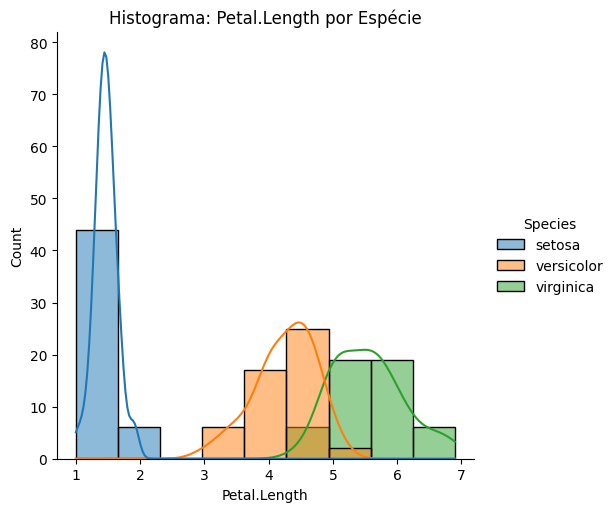

<Figure size 640x480 with 0 Axes>

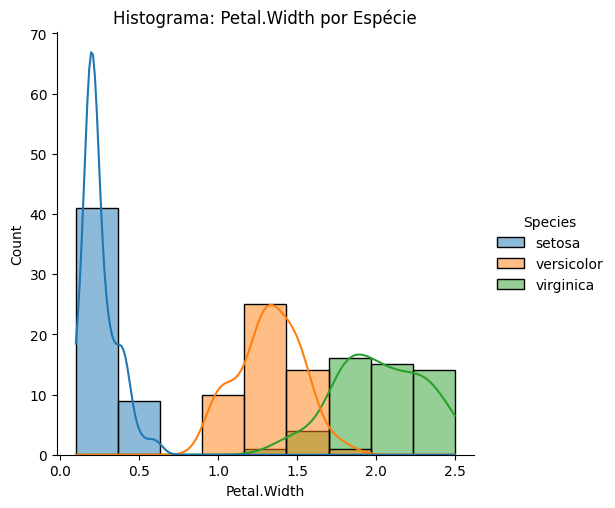

In [ ]:
for column in iris.columns[:-1]:
    plt.figure()
    sns.displot(data=iris, x=column, hue='Species', kde=True)
    plt.title(f'Histograma: {column} por Espécie')
    plt.show()

<Figure size 800x1000 with 0 Axes>

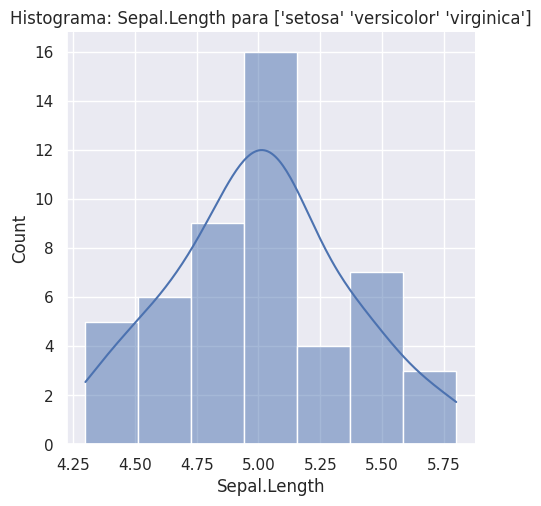

<Figure size 800x1000 with 0 Axes>

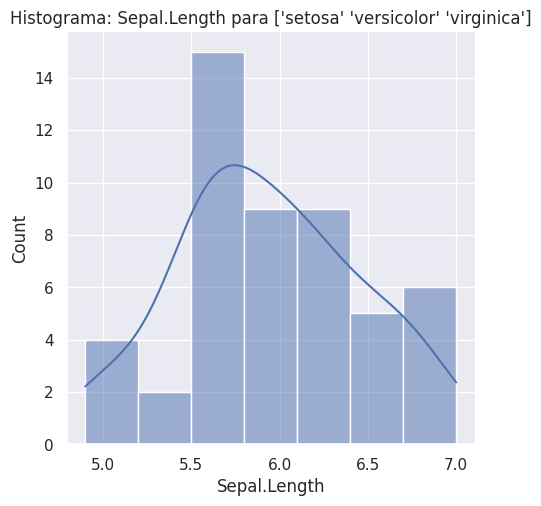

<Figure size 800x1000 with 0 Axes>

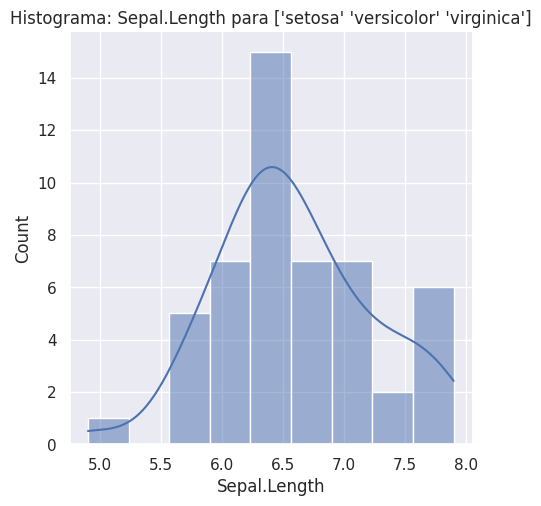

<Figure size 800x1000 with 0 Axes>

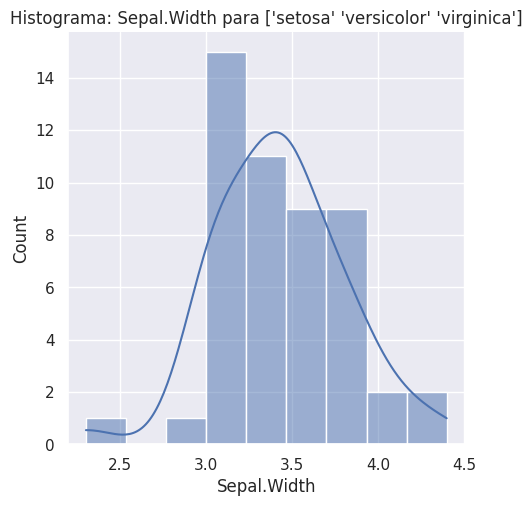

<Figure size 800x1000 with 0 Axes>

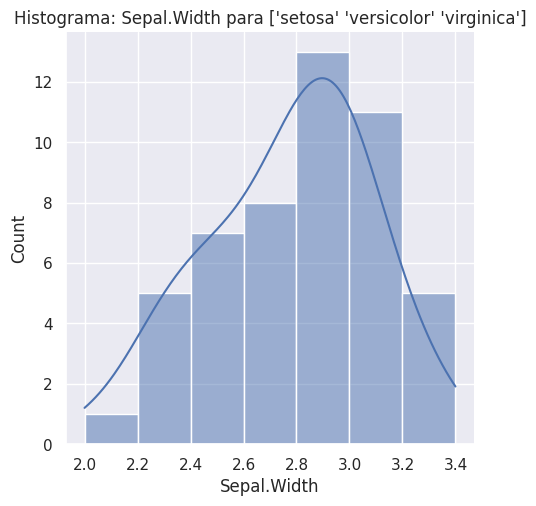

<Figure size 800x1000 with 0 Axes>

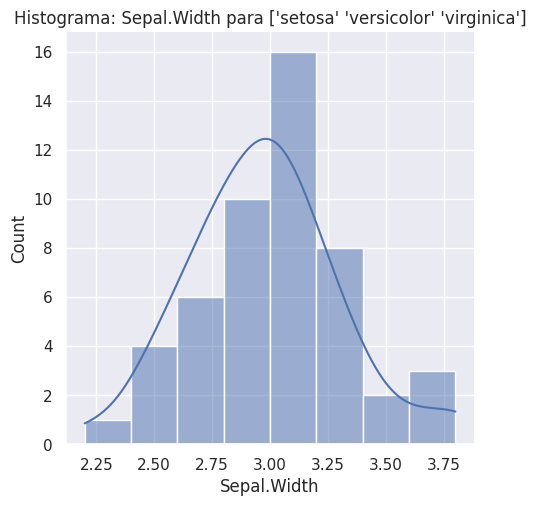

<Figure size 800x1000 with 0 Axes>

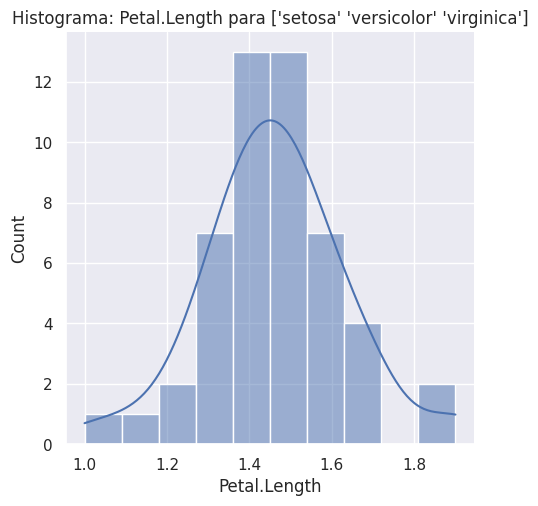

<Figure size 800x1000 with 0 Axes>

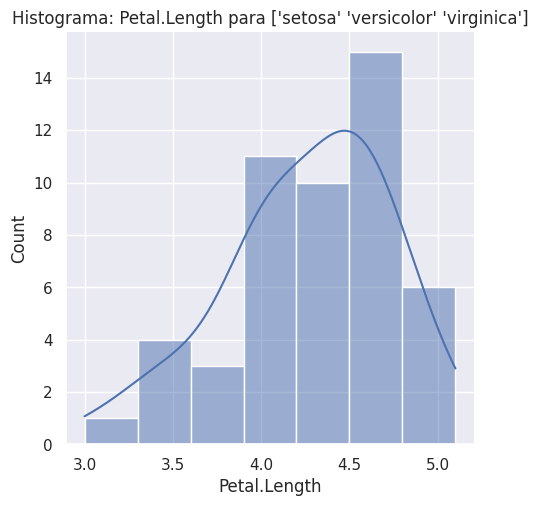

<Figure size 800x1000 with 0 Axes>

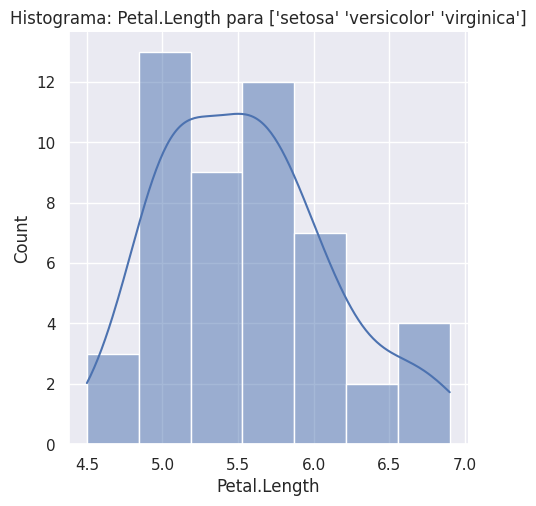

<Figure size 800x1000 with 0 Axes>

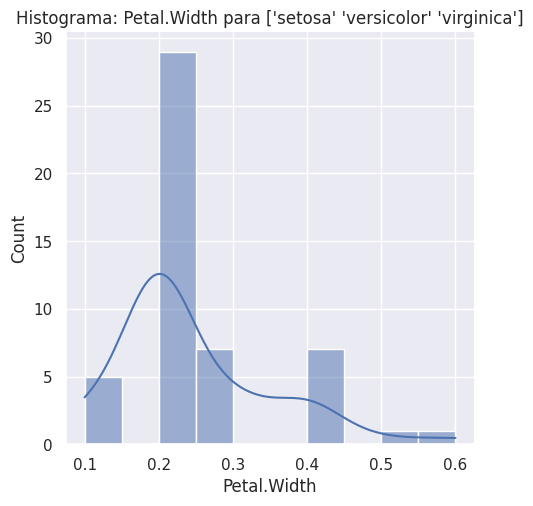

<Figure size 800x1000 with 0 Axes>

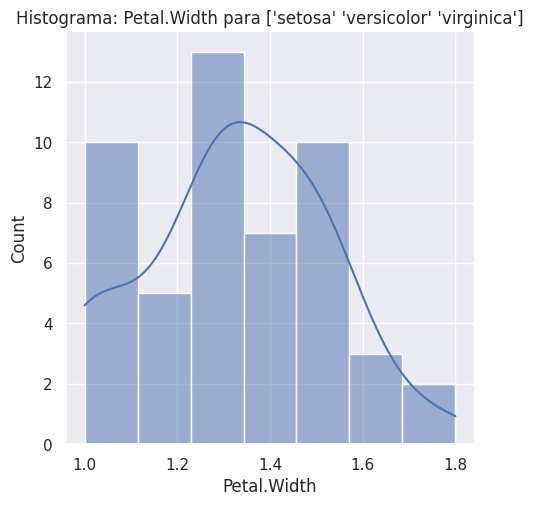

<Figure size 800x1000 with 0 Axes>

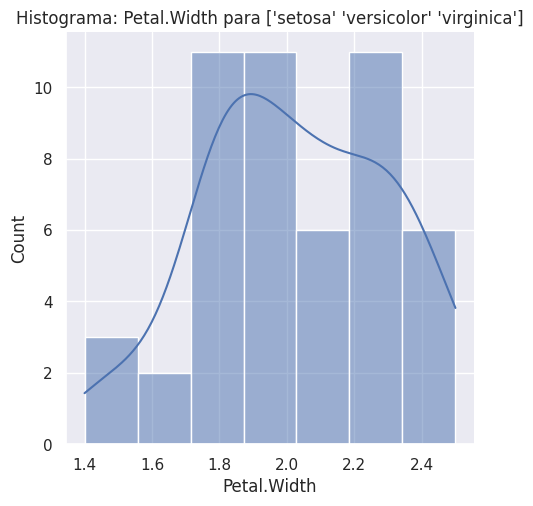

In [ ]:
especies = iris['Species'].unique()
plt.rcParams['figure.figsize'] =[8,10]
sns.set_theme()
for column in iris.columns[:-1]:
    for species in especies:
        plt.figure()
        sns.displot(data=iris[iris['Species']== species], x= column, kde=True)
        plt.title(f'Histograma: {column} para {especies}')
        plt.show()

#Boxplot


<ipython-input-13-6bcb0f3420b1>:5: FutureWarning: 

Setting a gradient palette using color= is deprecated and will be removed in v0.14.0. Set `palette='dark:cyan'` for the same effect.

  sns.boxplot(data=iris, x= column,hue='Species', color= 'cyan', showfliers=True)
<ipython-input-13-6bcb0f3420b1>:5: FutureWarning: 

Setting a gradient palette using color= is deprecated and will be removed in v0.14.0. Set `palette='dark:cyan'` for the same effect.

  sns.boxplot(data=iris, x= column,hue='Species', color= 'cyan', showfliers=True)
<ipython-input-13-6bcb0f3420b1>:5: FutureWarning: 

Setting a gradient palette using color= is deprecated and will be removed in v0.14.0. Set `palette='dark:cyan'` for the same effect.

  sns.boxplot(data=iris, x= column,hue='Species', color= 'cyan', showfliers=True)
<ipython-input-13-6bcb0f3420b1>:5: FutureWarning: 

Setting a gradient palette using color= is deprecated and will be removed in v0.14.0. Set `palette='dark:cyan'` for the same effect.

  sns.boxp

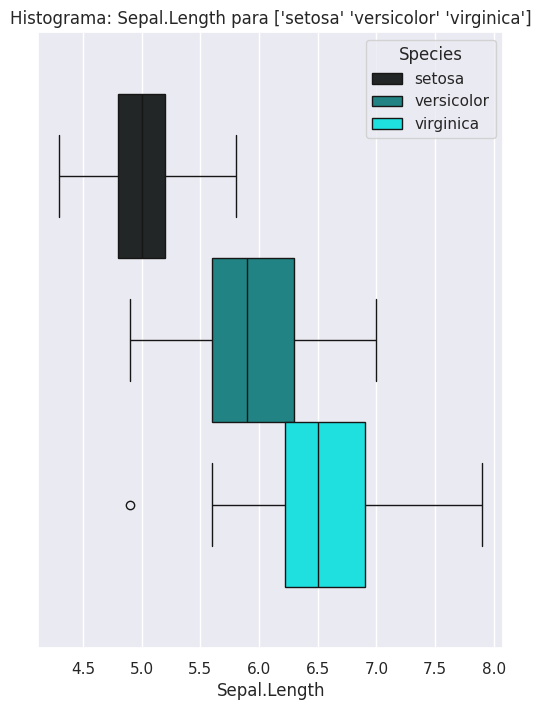

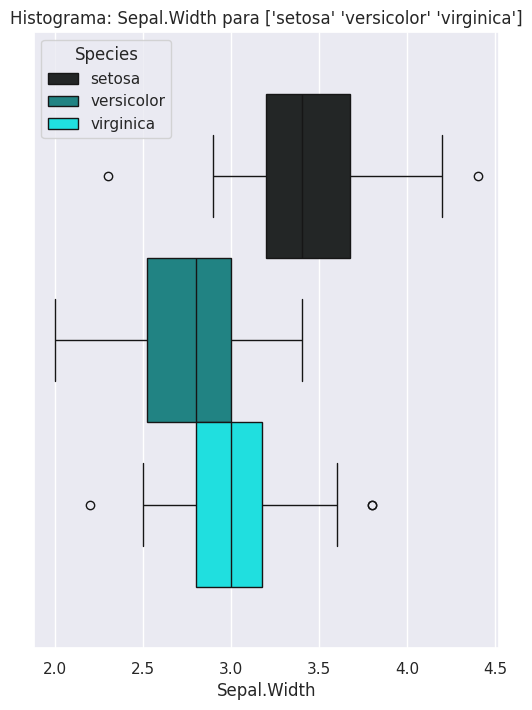

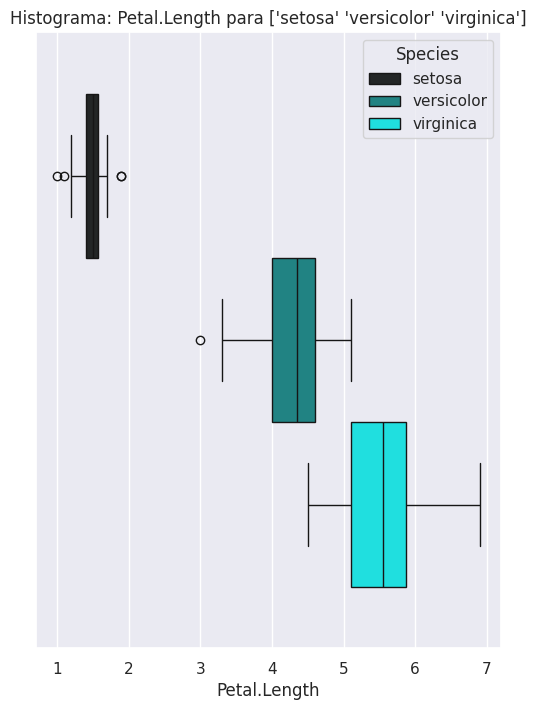

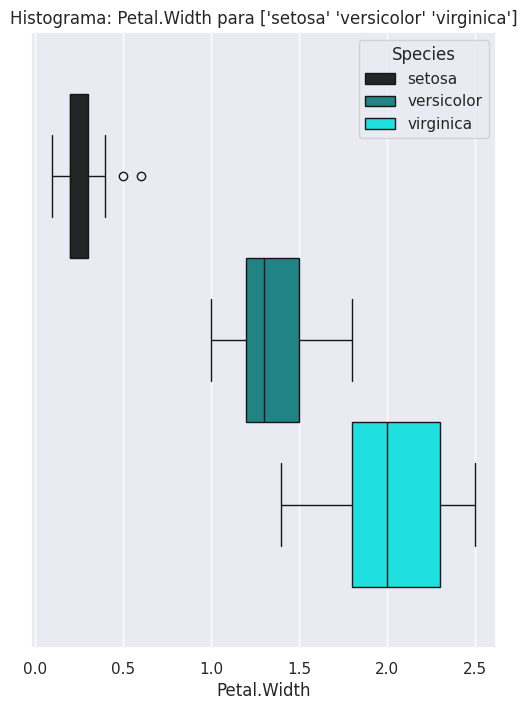

In [ ]:
plt.rcParams['figure.figsize'] =[6,8]
sns.set_theme()
for column in iris.columns[:-1]:
    plt.figure()
    sns.boxplot(data=iris, x= column,hue='Species', color= 'cyan', showfliers=True)
    plt.title(f'Histograma: {column} para {especies}')

c. Somente olhando esses gráficos, é possível utilizando uma ou
mais das propriedades (Sepal_Length, Sepal_Width, Petal_Length,
Petal_Width) que sejam suficientes para diferenciar entre as
diferentes espécies?


In [ ]:
#Sim, é possível separar utilizando qualquer uma dessas características

d. Aplique a regressão logística para avaliar o modelo de classificação.


In [ ]:
X = iris[['Sepal.Length', 'Sepal.Width', 'Petal.Length', 'Petal.Width']]
y = iris['Species']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# fit do modelo
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

LogisticRegression()

In [ ]:
y_pred = logreg.predict(X_test)
y_pred_proba = logreg.predict_proba(X_test)

In [ ]:
X_test_resultado = X_test.copy()
X_test_resultado["Previsao_Modelo"] = y_pred
X_test_resultado["Probabilidade_Setosa"] = y_pred_proba[:, 0]
X_test_resultado["Probabilidade_Versicolor"] = y_pred_proba[:, 1]
X_test_resultado["Probabilidade_Virginica"] = y_pred_proba[:, 2]

In [ ]:
X_test_resultado.head()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Previsao_Modelo,Probabilidade_Setosa,Probabilidade_Versicolor,Probabilidade_Virginica
74,6.1,2.8,4.7,1.2,versicolor,3.804492e-03,0.827741,1.684549e-01
19,5.7,3.8,1.7,0.3,setosa,9.469809e-01,0.053019,1.987404e-07
119,7.7,2.6,6.9,2.3,virginica,8.864487e-09,0.001549,9.984514e-01
79,6.0,2.9,4.5,1.5,versicolor,6.486862e-03,0.792228,2.012851e-01
77,6.8,2.8,4.8,1.4,versicolor,1.458122e-03,0.774129,2.244129e-01


e. Calcule a acurácia, precisão e recall.


In [ ]:
cm = confusion_matrix(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='macro')
recall = recall_score(y_test, y_pred, average='macro')


In [ ]:
print("Acurácia:", accuracy)
print("Precisão:", precision)
print("Recall:", recall)

Acurácia: 1.0
Precisão: 1.0
Recall: 1.0


f. Plote a matriz de confusao com matplotlib ou seaborn

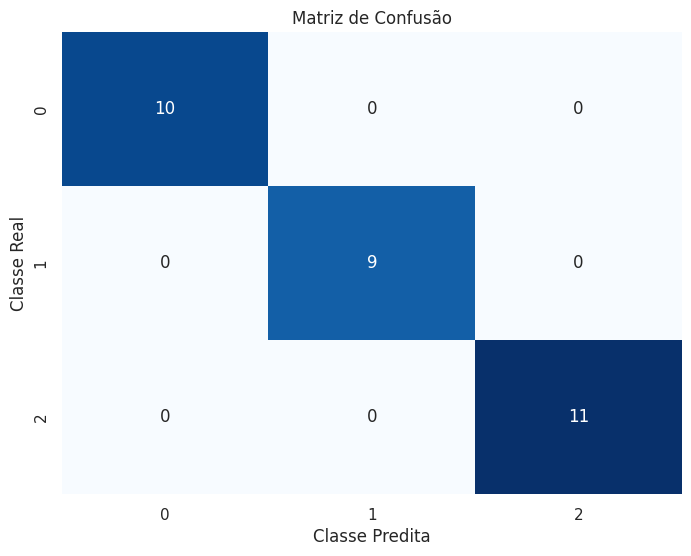

In [ ]:
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g', cbar=False)
plt.xlabel('Classe Predita')
plt.ylabel('Classe Real')
plt.title('Matriz de Confusão')
plt.show()

2. Utilizando o dataset load_digits. Exemplo de como fazer a
importação do dataset usando o sklearn:
from sklearn.datasets import load_digits
digits = load_digits()
Responda:
a. Faça uma análise inicial sobre esse dataset
i. Quantos dados possui?





In [ ]:
from sklearn.datasets import load_digits

In [ ]:
digits = load_digits()

In [ ]:
X = digits.data
y = digits.target

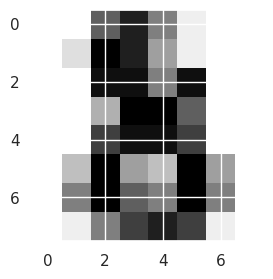

In [ ]:
plt.figure(1, figsize=(3, 3))
plt.imshow(digits.images[-1], cmap=plt.cm.gray_r, interpolation="nearest")
plt.show()

In [ ]:
#Transformando em um dataframe para visualização dos dados
digits_data = pd.DataFrame(data=X)
digits_data['target'] = y
print(digits_data.head())

     0    1    2     3     4     5    6    7    8    9  ...   55   56   57   58    59    60    61  \
0  0.0  0.0  5.0  13.0   9.0   1.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0  6.0  13.0  10.0   0.0   
1  0.0  0.0  0.0  12.0  13.0   5.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0  0.0  11.0  16.0  10.0   
2  0.0  0.0  0.0   4.0  15.0  12.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0  0.0   3.0  11.0  16.0   
3  0.0  0.0  7.0  15.0  13.0   1.0  0.0  0.0  0.0  8.0  ...  0.0  0.0  0.0  7.0  13.0  13.0   9.0   
4  0.0  0.0  0.0   1.0  11.0   0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0  0.0   2.0  16.0   4.0   

    62   63  target  
0  0.0  0.0       0  
1  0.0  0.0       1  
2  9.0  0.0       2  
3  0.0  0.0       3  
4  0.0  0.0       4  

[5 rows x 65 columns]


In [ ]:
digits_data.shape

(1797, 65)

##1797 linhas: total de amostras (dígitos manuscritos).
##64 colunas: características (pixels da imagem).
##1 coluna adicional: rótulo (classe) do dígito.

ii. Existem dados nulos? Se sim quantos?


In [ ]:
digits_data.isna().sum()

,0
0,0
1,0
2,0
3,0
4,0
5,0
6,0
7,0
8,0
9,0


##Sem valores nulos

iii. Todos são dados numéricos ou existem colunas com dados categóricos?

In [ ]:
digits_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1797 entries, 0 to 1796
Data columns (total 65 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       1797 non-null   float64
 1   1       1797 non-null   float64
 2   2       1797 non-null   float64
 3   3       1797 non-null   float64
 4   4       1797 non-null   float64
 5   5       1797 non-null   float64
 6   6       1797 non-null   float64
 7   7       1797 non-null   float64
 8   8       1797 non-null   float64
 9   9       1797 non-null   float64
 10  10      1797 non-null   float64
 11  11      1797 non-null   float64
 12  12      1797 non-null   float64
 13  13      1797 non-null   float64
 14  14      1797 non-null   float64
 15  15      1797 non-null   float64
 16  16      1797 non-null   float64
 17  17      1797 non-null   float64
 18  18      1797 non-null   float64
 19  19      1797 non-null   float64
 20  20      1797 non-null   float64
 21  21      1797 non-null   float64
 22  

##Todos os dados são numéricos

b. Aplique a regressão logística para construir e avaliar o modelo de
classificação



In [ ]:
X = digits.data
y = digits.target

In [ ]:
from sklearn.preprocessing import StandardScaler #O uso do standard é para normalização dos dados

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
#Recebi um aviso dizendo que tem poucos dados, vmos replicar com max_iter, escalonando os dados
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# fit do modelo
logreg = LogisticRegression(max_iter=200)
logreg.fit(X_train_scaled, y_train)

LogisticRegression(max_iter=200)

In [ ]:
y_pred = logreg.predict(X_test_scaled)

In [ ]:
#O F1-score é a média harmônica entre precisão e recall, e
#fornece uma única métrica para avaliar o desempenho do modelo, especialmente quando há um desbalanceamento entre classes.
#Um F1-score alto indica que tanto a precisão quanto o recall são bons.
#Suporte = numeros de amostras para cada classe

c. Calcule a acurácia, precisão e recall com base no desempenho do modelo.


In [ ]:
accuracydigi = accuracy_score(y_test, y_pred)
precisiondigi = precision_score(y_test, y_pred,average='weighted')
recalldigi = recall_score(y_test, y_pred,average='weighted')
print("Acurácia:", accuracydigi)
print("Precisão:", precisiondigi)
print("Recall:", recalldigi)

Acurácia: 0.9722222222222222
Precisão: 0.9725212596953555
Recall: 0.9722222222222222


d. Plote a matriz de confusão dos resultados do modelo utilizando matplotlib ou seaborn.







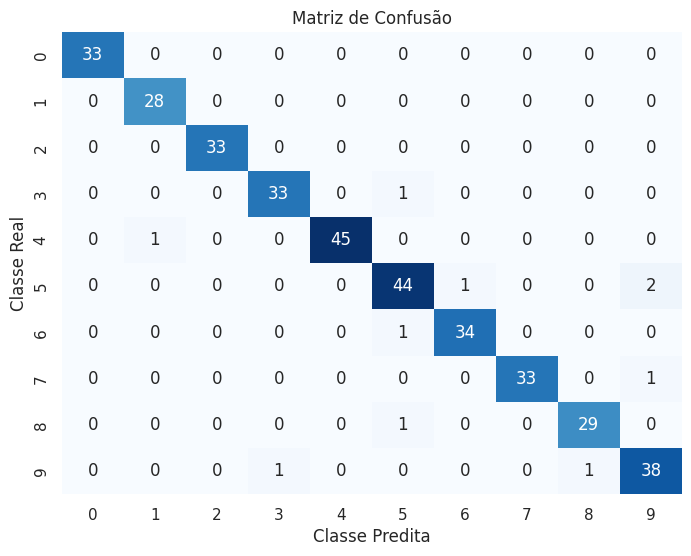

In [ ]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g', cbar=False)
plt.xlabel('Classe Predita')
plt.ylabel('Classe Real')
plt.title('Matriz de Confusão')
plt.show()

In [ ]:
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        33
           1       0.97      1.00      0.98        28
           2       1.00      1.00      1.00        33
           3       0.97      0.97      0.97        34
           4       1.00      0.98      0.99        46
           5       0.94      0.94      0.94        47
           6       0.97      0.97      0.97        35
           7       1.00      0.97      0.99        34
           8       0.97      0.97      0.97        30
           9       0.93      0.95      0.94        40

    accuracy                           0.97       360
   macro avg       0.97      0.97      0.97       360
weighted avg       0.97      0.97      0.97       360



e. Aplique a regressão logística para avaliar o modelo de classificação dos
dígitos de 0 a 9 utilizando o conjunto de dados específico para esse problema
(por exemplo, MNIST).


In [ ]:
import tensorflow as tf

#carregando MNIST
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

#dataset
print(x_train.shape, y_train.shape)

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step
(60000, 28, 28) (60000,)


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical

# Normalizando os dados (para valores entre 0 e 1)
x_train, x_test = x_train / 255.0, x_test / 255.0

# Transformando as labels em formato categórico
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

# Construindo o modelo de regressão logística
model = Sequential([
    Flatten(input_shape=(28, 28)),  # Achata as imagens 28x28 em um vetor de 784 pixels
    Dense(10, activation='softmax')  # 10 classes de saída para as 10 classes do MNIST
])

# Compilando o modelo
model.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'])

# Treinando o modelo
model.fit(x_train, y_train, epochs=10, validation_data=(x_test, y_test))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.7117 - loss: 1.1237 - val_accuracy: 0.8815 - val_loss: 0.4803
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8779 - loss: 0.4761 - val_accuracy: 0.8949 - val_loss: 0.3999
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.8877 - loss: 0.4130 - val_accuracy: 0.9019 - val_loss: 0.3665
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8954 - loss: 0.3816 - val_accuracy: 0.9060 - val_loss: 0.3479
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - accuracy: 0.9007 - loss: 0.3644 - val_accuracy: 0.9089 - val_loss: 0.3355
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9032 - loss: 0.3492 - val_accuracy: 0.9109 - val_loss: 0.3259
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9060 - loss: 0.3406 - val_accuracy: 0.9121 - val_loss: 0.3196
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9068 - loss: 0.3326 -

f. Calcule a acurácia, precisão e recall com base no desempenho do modelo
para a classificação dos dígitos de 0 a 9.


In [ ]:
y_pred = model.predict(x_test)
y_pred_classes = y_pred.argmax(axis=1)  # Converte as probabilidades em classes previstas
y_true = y_test.argmax(axis=1)  # Converte as labels de teste de one-hot para classes

# Calculando e exibindo as métricas
print("Acurácia:", accuracy_score(y_true, y_pred_classes))
print("Precisão:", precision_score(y_true, y_pred_classes, average='weighted'))
print("Recall:", recall_score(y_true, y_pred_classes, average='weighted'))
print("\nRelatório de Classificação:\n", classification_report(y_true, y_pred_classes))

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step
Acurácia: 0.9155
Precisão: 0.9155614639111949
Recall: 0.9155

Relatório de Classificação:
               precision    recall  f1-score   support

           0       0.94      0.98      0.96       980
           1       0.96      0.97      0.97      1135
           2       0.93      0.87      0.90      1032
           3       0.89      0.91      0.90      1010
           4       0.91      0.93      0.92       982
           5       0.91      0.84      0.88       892
           6       0.93      0.95      0.94       958
           7       0.92      0.91      0.92      1028
           8       0.86      0.88      0.87       974
           9       0.90      0.89      0.89      1009

    accuracy                           0.92     10000
   macro avg       0.91      0.91      0.91     10000
weighted avg       0.92      0.92      0.92     10000



g. Plote a matriz de confusão dos resultados da classificação dos dígitos de 0 a 9 utilizando matplotlib ou seaborn.

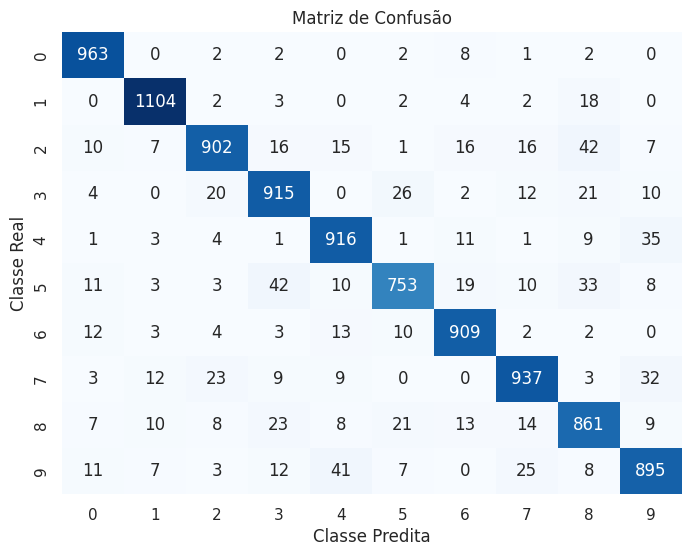

In [ ]:
cm = confusion_matrix(y_true, y_pred_classes)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g', cbar=False)
plt.xlabel('Classe Predita')
plt.ylabel('Classe Real')
plt.title('Matriz de Confusão')
plt.show()